# Pandas
## Primeros pasos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Core components: `Series` y `DataFrame`
`Pandas` tiene dos objetos principales: `Series` y `DataFrame`.

Una `Series` es esencialmente una columna, y un `DataFrame` es una tabla compuesta de una colección de `Series`.

![](img/pandas_1.png)


## Crear un DataFrame desde cero
Hay más de una forma de crear un `DataFrame`, pero una opción rápida y sencilla es utilizando un diccionario para alimentar los datos.

Supongamos que somos dueños de un puesto de frutas. Queremos tener una columna para cada fruta y una fila para cada venta que le hacemos a un cliente.

In [2]:
data = {
    'manzanas' : [3,2,0,1],
    'naranjas' : [0,3,1,2],
    'kiwis' :    [1,1,5,2]
}

Este diccionario lo vamos a usar para crear nuestro DataFrame. El método que crea el DataFrame a partir de un diccionario sabe que deberá tomar las **llaves** del diccionario como **columnas** y las **listas de valores** como las **filas**.

In [3]:
df = pd.DataFrame(data)
df

,manzanas,naranjas,kiwis
0,3,0,1
1,2,3,1
2,0,1,5
3,1,2,2


In [4]:
manzanas = df['manzanas']
manzanas

0    3
1    2
2    0
3    1
Name: manzanas, dtype: int64

In [5]:
df.naranjas

0    0
1    3
2    1
3    2
Name: naranjas, dtype: int64

In [6]:
list(df.naranjas)

[0, 3, 1, 2]

---

# Análisis exporatorio

## Lectura de bases de datos
Sin duda, la manera que más común de crear DataFrames en Pandas es leyendo una base de datos de un archivo externo.

### Base de Datos de películas
Descargué una base de datos de películas de IMDb de Kaggle. [Ésta es la liga](https://www.kaggle.com/PromptCloudHQ/imdb-data) a la base de datos.


### Descripción

Here's a data set of 1,000 most popular movies on IMDB in the last 10 years. The data points included are:

Title, Genre, Description, Director, Actors, Year, Runtime, Rating, Votes, Revenue, Metascrore

Feel free to tinker with it and derive interesting insights.

---

Comencemos leyendo la base de datos con `read_csv()`

In [30]:
df = pd.read_csv('data/imdb.csv')

Leimos el archivo sin ningún problema. Ahora lo primero que nos gustaría hacer es ver las  primeras filas de nuestra tabla. Pandas nos permite inspeccionar las  primeras 5 filas utlizando el método `head()`.

**Nota: se utiliza el nombre de variable `df` para abreviar `DataFrame`** 

In [31]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Si quisieramos ver más filas, podemos pasar un número entero al método `head()` y nos mostrará el número de filas que especifiquemos. Mostremos las primeras diez filas usando `df.head(10)`

In [32]:
df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


O bien, podemos ver los **últimos** registros del DataFrame usando el método `tail`

In [33]:
df.tail(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


Quiero saber el nombre de cada una de las columnas

In [34]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [35]:
df["Rank"].head()

0    1
1    2
2    3
3    4
4    5
Name: Rank, dtype: int64

Es más fácil trabajar con nombres de columnas que no tengan espacios, por lo siguiente:

Podemos acceder a los elementos de una columna específica a través de su nombre

In [36]:
df.Rank.head()

0    1
1    2
2    3
3    4
4    5
Name: Rank, dtype: int64

Cuando el nombre de la columna con la que deseamos trabajar **no tiene espacio**, podemos usar la notación `dataframe.columna`, pero si tiene espacio, tenemos que poner los valores entre comillas y corchetes.

In [37]:
# Esto nos va a dar un error
df.Revenue (Millions)

AttributeError: 'DataFrame' object has no attribute 'Revenue'

Si el nombre de la columna tiene espaicios o caracteres especiales, debemos usar comillas. Específicamente, utilizamos la notación
~~~~python
dataframe["nombre de la columna"]
~~~~

In [38]:
# Esto va a funcionar 
df['Revenue (Millions)'].head()

0    333.13
1    126.46
2    138.12
3    270.32
4    325.02
Name: Revenue (Millions), dtype: float64

In [39]:
df.rename(columns = {'Revenue (Millions)':'Revenue_Millions'}, inplace=True)
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue_Millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


Ah caray... Renombramos la columna, pero al mostrar el DataFrame, vemos que la columna sigue teniendo el nombre pasado `"Revenue (Millions)"`.

### ¿Por qué?

Para evitarnos problemas, lo que podemos hacer es renombrar las columnas

In [40]:
df = df.rename(columns = {'Revenue (Millions)':'Revenue_Millions'})
df = df.rename(columns = {'Runtime (Minutes)':'Runtime_Minutes'})
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_Minutes', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore'],
      dtype='object')

Podemos lograr lo mismo si agregamos el parámetro `inplace=True` al método `rename()`
~~~~python
df.rename(columns={"Revenue (Millions)": "Revenue"}, inplace=True)
~~~~

In [41]:
df.head(2)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


Aunque ver las primeras filas ya nos dice bastante acerca del conjunto de datos, es necesario poder obtener un resumen más amplio.

Para esto, podemos utilizar dos métodos:

- `DataFrame.info()`: Imprime un resumen conciso del dataframe incluyendo tipo de dato del índice, tipo de dato de cada columna, si hay o no valores nulos, tamaño en memoria del dataframe.
- `DataFrame.describe()`: Genera estadisticos básicos (descriptivos) del dataframe


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              1000 non-null   int64  
 1   Title             1000 non-null   object 
 2   Genre             1000 non-null   object 
 3   Description       1000 non-null   object 
 4   Director          1000 non-null   object 
 5   Actors            1000 non-null   object 
 6   Year              1000 non-null   int64  
 7   Runtime_Minutes   1000 non-null   int64  
 8   Rating            1000 non-null   float64
 9   Votes             1000 non-null   int64  
 10  Revenue_Millions  872 non-null    float64
 11  Metascore         936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


Este output nos informa lo siguiente:
- Tnemos un dataframe que tiene 1000 renglones con 12 columnas
- La variable **Rank** cuenta con 1000 valores enteros no nulos
- La variable **Title** cuenta con 1000 valores objeto no nulos
- La variable **Genre** cuenta con 1000 valores objeto no nulos
- $\vdots$
- La variable **Votes** cuenta con 1000 valores flotantes no nulos

Sin embargo, vemos que el número de **Revenue_Millions** y **Metascore** no es 1000


Si ejecutamos `DataFrame.Series.isna()`, nos va a regresar un `DataFrame` que contenga `True` si el valor en esa posición es `na` y `False` si no lo es. Por lo tanto, para probar si existe **por lo menos** un valor `na` podemos concatenar el método `any()` a `DataFrame.Series.isna()`. O sea  `DataFrame.Series.isna().any()`

Veamos esto paso por paso:

1.  `DataFrame.Series.isna()`

In [46]:
df.Metascore.isna()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Metascore, Length: 1000, dtype: bool

Como podemos ver, hay varios valores en `True`. El problema con esto es que no podemos ver los 1000 valores al mismo tiempo porque pandas se salta la mayoría de las observaciones para no imprimir un output demasiado grande. En este caso, Juyter y Pandas nos mostran las observaciones 0 a 4 y 995 a 999. Entonces tenemos muchos valores en medio que no estamos viendo. Es mejor entonces comprobar si existen o no `na` utilizando  `DataFrame.Series.isna().any()`

In [23]:
df.Revenue_Millions.isna().any()

True

Hagamos lo mismo para `Metascore`

In [24]:
df.Metascore.isna().any()

True

Ok, entonces tenemos valores `na` tanto en `Metascore` como en `Revenue_Millions`. ¿Pero cuántos?

In [25]:
print("Número total de NA en Metascore:", df.Metascore.isna().sum())
print("Número total de NA en Revenue Millions:", df.Revenue_Millions.isna().sum())

Número total de NA en Metascore: 64
Número total de NA en Revenue Millions: 128


Es un gran inconveniente tener valores NA ya que éstos pueden estropear cálculos, visualizaciones, etc... Quitémoslos.

Dato que tener valores NA es un escenario bastante común y bastante indeseable, pandas facilita la eliminación de estos valores con el método `dropna()`

In [50]:
df = df.dropna().copy()

Veamos info nuevamente

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              838 non-null    int64  
 1   Title             838 non-null    object 
 2   Genre             838 non-null    object 
 3   Description       838 non-null    object 
 4   Director          838 non-null    object 
 5   Actors            838 non-null    object 
 6   Year              838 non-null    int64  
 7   Runtime_Minutes   838 non-null    int64  
 8   Rating            838 non-null    float64
 9   Votes             838 non-null    int64  
 10  Revenue_Millions  838 non-null    float64
 11  Metascore         838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


Ya no tenemos ningún valor en nulo

In [59]:
df.describe()

,Rank,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
count,838.00000,838.00000,838.00000,838.00000,838.00000,838.00000,838.00000
mean,485.24702,2012.50716,114.63842,6.81432,193230.25179,84.56456,59.57518
std,286.57206,3.17236,18.47092,0.87775,193099.00510,104.52023,16.95242
min,1.00000,2006.00000,66.00000,1.90000,178.00000,0.00000,11.00000
25%,238.25000,2010.00000,101.00000,6.30000,61276.50000,13.96750,47.00000
50%,475.50000,2013.00000,112.00000,6.90000,136879.50000,48.15000,60.00000
75%,729.75000,2015.00000,124.00000,7.50000,271083.00000,116.80000,72.00000
max,1000.00000,2016.00000,187.00000,9.00000,1791916.00000,936.63000,100.00000


Está un poco molesto ver números con notación científica. Podemos cambiar la forma en la que se muestran los números en pandas

In [58]:
pd.options.display.float_format = '{:.5f}'.format

Vemos claramente que la media (mean) del Rating es de 6.81.

Calculemos esto por nuestra cuenta:

In [55]:
ratings = df.Rating

In [57]:
type(ratings)

pandas.core.series.Series

In [56]:
np.mean(ratings)

6.814319809069212

In [60]:
ratings.mean()

6.814319809069212

Quiero ver cuáles son los valores **unicos** de la variable `Rating`

In [61]:
df['Rating'].unique()

array([8.1, 7. , 7.3, 7.2, 6.2, 6.1, 8.3, 7.1, 7.5, 7.8, 7.9, 7.7, 6.4,
       6.6, 8.2, 6.7, 8. , 6.5, 5.3, 5.9, 6.3, 5.6, 8.6, 7.6, 6.9, 5.8,
       9. , 7.4, 4.1, 8.5, 6.8, 8.8, 5.4, 6. , 5.7, 8.4, 4.7, 5.2, 5.5,
       3.9, 4.9, 5.1, 4.3, 5. , 4.6, 4. , 1.9, 2.7, 4.4, 4.8])

In [62]:
np.sort(df['Rating'].unique())

array([1.9, 2.7, 3.9, 4. , 4.1, 4.3, 4.4, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.8, 9. ])

In [69]:
df[df.Rating > 8].head(3)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.10000,757074,333.13000,76.00000
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.30000,258682,151.06000,93.00000
16,17,Hacksaw Ridge,"Biography,Drama,History","WWII American Army Medic Desmond T. Doss, who ...",Mel Gibson,"Andrew Garfield, Sam Worthington, Luke Bracey,...",2016,139,8.20000,211760,67.12000,71.00000


In [65]:
rating_counts = pd.DataFrame({'rating' : df.Rating.value_counts().index, 'frequency' : df.Rating.value_counts().values})

In [70]:
rating_counts = rating_counts.sort_values(['rating'])
rating_counts.head(6)

,rating,frequency
46,1.90000,1
47,2.70000,1
40,3.90000,2
45,4.00000,1
42,4.10000,1
35,4.30000,3


<BarContainer object of 50 artists>

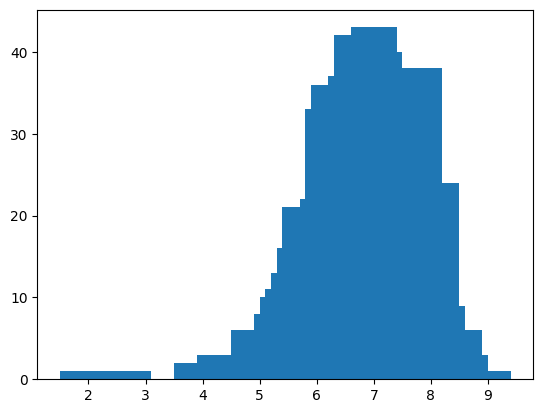

In [68]:
plt.bar(rating_counts.rating, rating_counts.frequency)

In [71]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime_Minutes', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore'],
      dtype='object')

# Visualizaciones
Haremos unas visualizaciones utilizando `matplotlib`, mismo que ya importamos al principio del notebook
~~~~python
import matplotlib.pyplot as plt
~~~~

(array([  1.,   1.,   3.,  10.,  37., 118., 246., 243., 161.,  18.]),
 array([1.9 , 2.61, 3.32, 4.03, 4.74, 5.45, 6.16, 6.87, 7.58, 8.29, 9.  ]),
 <BarContainer object of 10 artists>)

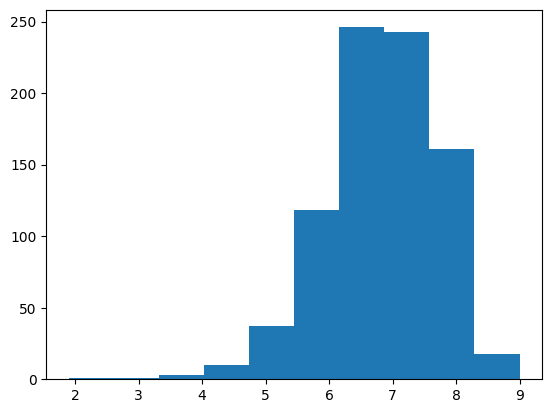

In [72]:
# Vamos a ver la distribución de la variable Rating con un histograma. El argumento 10 indica que queremos 10 barras en el histograma.
plt.hist(df.Rating,10)

Veamos ahora la variable metascore

(array([ 2.,  4.,  8., 10., 34., 39., 57., 41., 80., 60., 77., 81., 79.,
        71., 56., 69., 34., 19., 10.,  7.]),
 array([ 11.  ,  15.45,  19.9 ,  24.35,  28.8 ,  33.25,  37.7 ,  42.15,
         46.6 ,  51.05,  55.5 ,  59.95,  64.4 ,  68.85,  73.3 ,  77.75,
         82.2 ,  86.65,  91.1 ,  95.55, 100.  ]),
 <BarContainer object of 20 artists>)

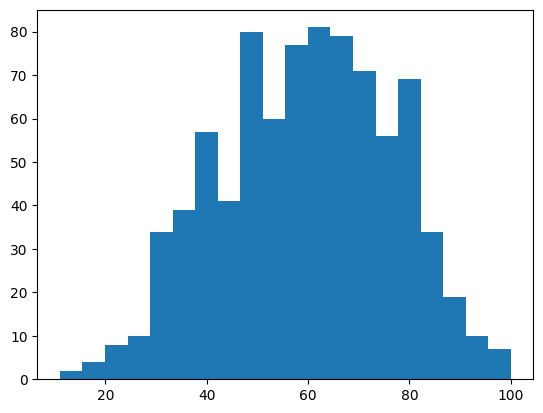

In [75]:
plt.hist(df.Metascore,20)

Ahora que les parece si intentamos encontrar qué variables están correlacionadas entre sí. Para esto, construiremos una matriz de correlación, la cual nos pintará un mapa de calor con los valores de correlación.

Primero crearemos un dataframe que contendrá únicamente las variables numéricas, y a partir de este, crearemos la matriz de correlación utilizando el método `corr()`

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 838 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              838 non-null    int64  
 1   Title             838 non-null    object 
 2   Genre             838 non-null    object 
 3   Description       838 non-null    object 
 4   Director          838 non-null    object 
 5   Actors            838 non-null    object 
 6   Year              838 non-null    int64  
 7   Runtime_Minutes   838 non-null    int64  
 8   Rating            838 non-null    float64
 9   Votes             838 non-null    int64  
 10  Revenue_Millions  838 non-null    float64
 11  Metascore         838 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.1+ KB


In [78]:
df[['Rank', 'Title']]

,Rank,Title
0,1,Guardians of the Galaxy
1,2,Prometheus
2,3,Split
3,4,Sing
4,5,Suicide Squad
...,...,...
993,994,Resident Evil: Afterlife
994,995,Project X
996,997,Hostel: Part II
997,998,Step Up 2: The Streets


In [79]:
df_corr = df[['Year', 'Runtime_Minutes', 'Rating', 'Votes', 'Revenue_Millions', 'Metascore']].corr()
df_corr


,Year,Runtime_Minutes,Rating,Votes,Revenue_Millions,Metascore
Year,1.00000,-0.10193,-0.14570,-0.36244,-0.12920,-0.06230
Runtime_Minutes,-0.10193,1.00000,0.37457,0.39930,0.28172,0.22140
Rating,-0.14570,0.37457,1.00000,0.51745,0.21711,0.67273
Votes,-0.36244,0.39930,0.51745,1.00000,0.63683,0.33267
Revenue_Millions,-0.12920,0.28172,0.21711,0.63683,1.00000,0.14240
Metascore,-0.06230,0.22140,0.67273,0.33267,0.14240,1.00000


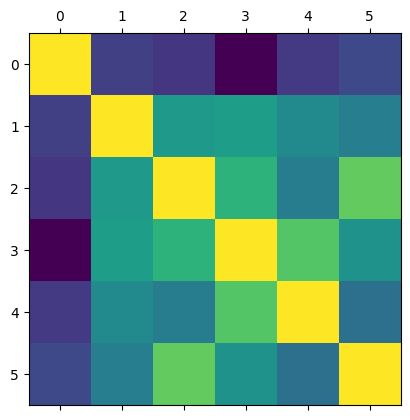

In [80]:
plt.matshow(df_corr)
plt.show()

¡Bien! Pero podemos mejorar un poco esta visualización. Para empezar, estaría bien saber qué significa cada color. Adicionalmente, en lugar de poner los índices numéricos de las variables, sería mejor poner los nombres de las variables.

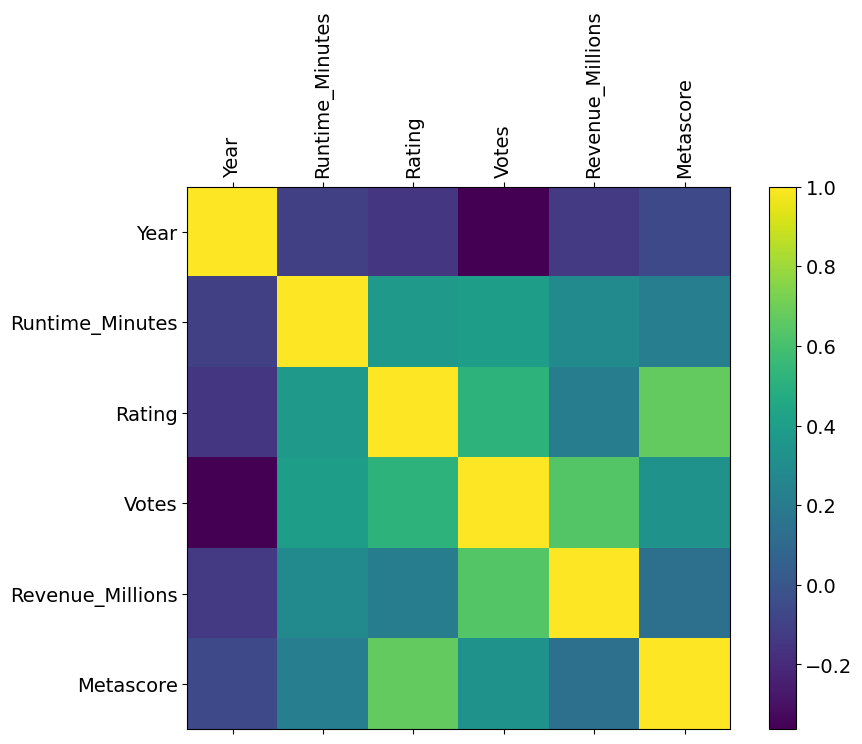

In [81]:
# Cambiar el tamaño de la figura
f = plt.figure(figsize=(10, 7))

# Mostrar la matriz de correlación
plt.matshow(df_corr, fignum=f.number)

# Añadir las etiquetas de las variables
plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=14, rotation=90)
plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=14)

# Añadir una leyenda de color
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

# Mostrar el gráfico
plt.show()

Matplotlib es una librería muy flexible y nos permite hacer muchas cosas. Sin embargo, su uso, y sobre todo su personalización, puede ser un poco complicado. Por suerte, existe una librería que se construyó sobre matplotlib y que nos permite hacer visualizaciones más atractivas y con menos código. Esta librería es `seaborn`.

Seaborn ya viene instalado en este entorno virtual, pero si no lo tuvieran instalado, pueden hacerlo con el siguiente comando:
~~~~bash
pip install seaborn
~~~~

Y ahora importamos seaborn

~~~~python
import seaborn as sns
~~~~

Nota que importamos seaborn como `sns`. Esto es una convención que se sigue en la comunidad de Python y que nos permite escribir menos código.


In [83]:
import seaborn as sns

Ya que tenemos seaborn, vamos a construir nuevamente la matriz de correlación, pero ahora con seaborn. Para esto, utilizaremos el método `heatmap()` de seaborn. Le mandamos dos argumentos:
* `data`: el dataframe que contiene las variables numéricas
* `annot`: si queremos que se muestren los valores de correlación en cada celda

<Axes: >

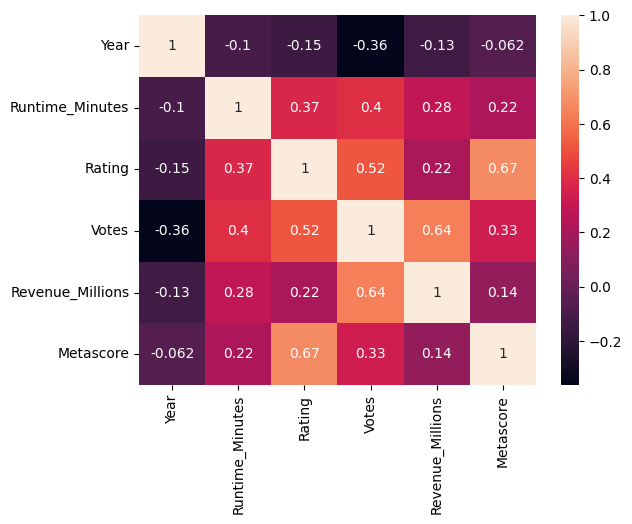

In [84]:
sns.heatmap(df_corr, annot=True)

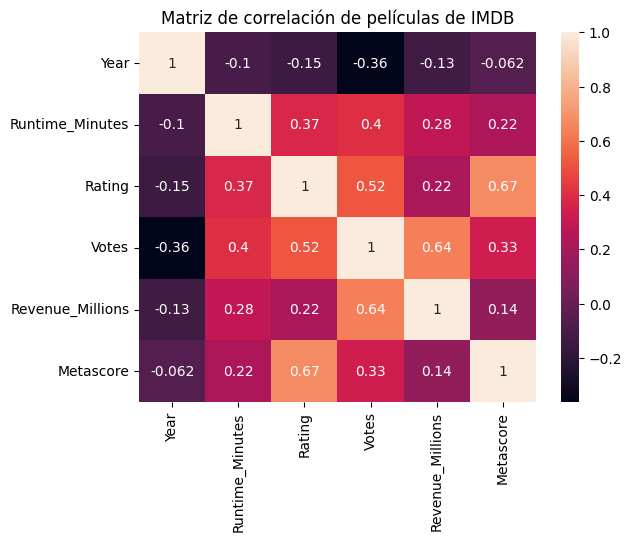

In [85]:
sns.heatmap(df_corr, annot=True)
plt.title("Matriz de correlación de películas de IMDB")
plt.show()

Cambiemos la paleta de colores a `coolwarm` utilizando el argumento `cmap`

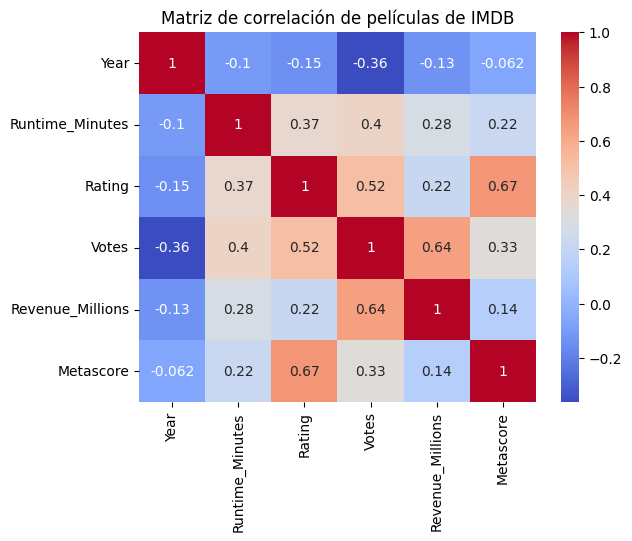

In [86]:
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación de películas de IMDB")
plt.show()

Cambiemos la paleta de colores a `RdYlGn` utilizando el argumento `cmap`

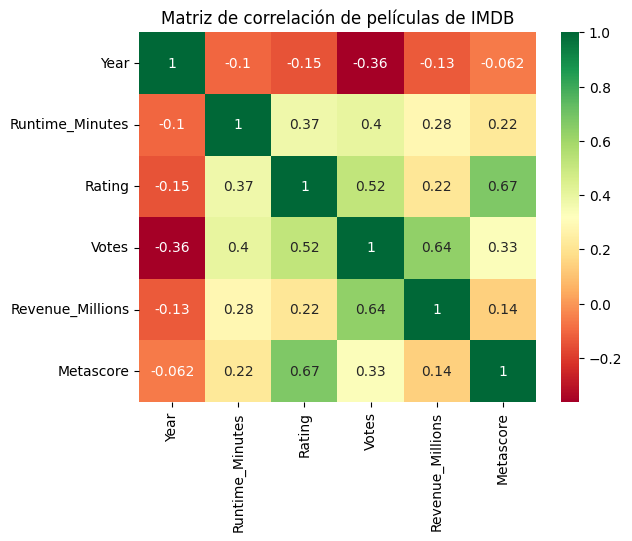

In [87]:
sns.heatmap(df_corr, annot=True, cmap='RdYlGn')
plt.title("Matriz de correlación de películas de IMDB")
plt.show()